In [1]:
!git clone https://github.com/Mat-Gug/face_detection_project.git

Cloning into 'face_detection_project'...
remote: Enumerating objects: 73056, done.
remote: Counting objects: 100% (3024/3024), done.
remote: Compressing objects: 100% (3021/3021), done.
remote: Total 73056 (delta 4), reused 3023 (delta 3), pack-reused 70032
Receiving objects: 100% (73056/73056), 2.03 GiB | 44.02 MiB/s, done.
Resolving deltas: 100% (5/5), done.
Updating files: 100% (73043/73043), done.


1) tropea.jpg
2) chiara-ferragni-fedez.jpg
3) harry-potter.jpg
4) dog.jpg
5) papa-francesco.jpg
6) giorgia-meloni-tunisia.jpg
7) tower-bridge.jpg
8) cat.jpg
9) stranger-things.jpg
10) amadeus.jpg
11) harry-meghan.jpg
12) how-i-met-your-mother.jpg
13) Samantha-Cristoforetti.jpg
14) plitvice-national-park.jpg
15) beatles.jpg
16) colosseum.jpg
17) hunger-games.jpg
18) maneskin.jpg
19) fabiola-gianotti.jpg
20) angelina-jolie.jpg
21) three-peaks-of-lavaredo.jpg
22) dua-lipa.jpg
Enter the number associated with the image you want: 10
Number of detected faces: 1
1) Coordinates: [368  16 752 400], score: 2.3419173738007952


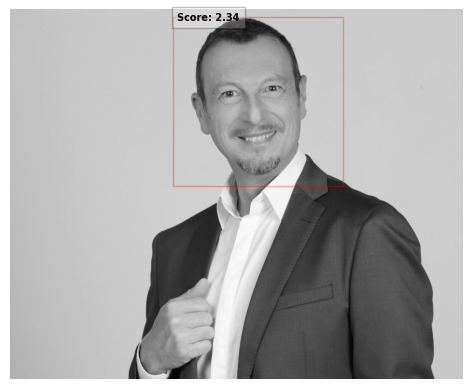

Do you want to check another image? (yes/no) yes
1) tropea.jpg
2) chiara-ferragni-fedez.jpg
3) harry-potter.jpg
4) dog.jpg
5) papa-francesco.jpg
6) giorgia-meloni-tunisia.jpg
7) tower-bridge.jpg
8) cat.jpg
9) stranger-things.jpg
10) amadeus.jpg
11) harry-meghan.jpg
12) how-i-met-your-mother.jpg
13) Samantha-Cristoforetti.jpg
14) plitvice-national-park.jpg
15) beatles.jpg
16) colosseum.jpg
17) hunger-games.jpg
18) maneskin.jpg
19) fabiola-gianotti.jpg
20) angelina-jolie.jpg
21) three-peaks-of-lavaredo.jpg
22) dua-lipa.jpg
Enter the number associated with the image you want: 18
Number of detected faces: 4
1) Coordinates: [192   0 336 144], score: 1.8387422523045243
2) Coordinates: [528  32 672 176], score: 1.1779817715109286
3) Coordinates: [384 112 528 256], score: 0.9324525815245068
4) Coordinates: [ 64  64 160 160], score: 0.8451071454710117


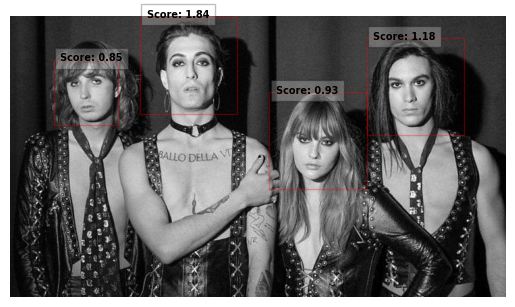

Do you want to check another image? (yes/no) yes
1) tropea.jpg
2) chiara-ferragni-fedez.jpg
3) harry-potter.jpg
4) dog.jpg
5) papa-francesco.jpg
6) giorgia-meloni-tunisia.jpg
7) tower-bridge.jpg
8) cat.jpg
9) stranger-things.jpg
10) amadeus.jpg
11) harry-meghan.jpg
12) how-i-met-your-mother.jpg
13) Samantha-Cristoforetti.jpg
14) plitvice-national-park.jpg
15) beatles.jpg
16) colosseum.jpg
17) hunger-games.jpg
18) maneskin.jpg
19) fabiola-gianotti.jpg
20) angelina-jolie.jpg
21) three-peaks-of-lavaredo.jpg
22) dua-lipa.jpg
Enter the number associated with the image you want: 17
Number of detected faces: 2
1) Coordinates: [ 80   0 224 144], score: 0.9391842942232946
2) Coordinates: [304  96 400 192], score: 0.7085583997121749


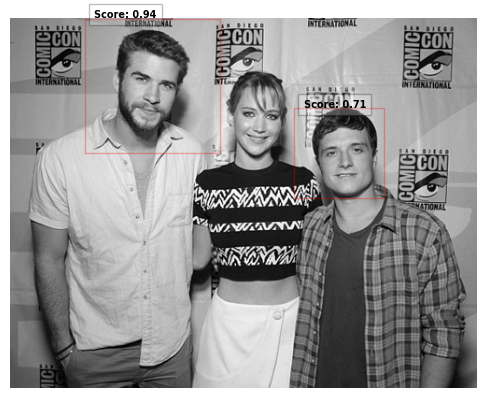

Do you want to check another image? (yes/no) 3
Invalid answer.
Do you want to check another image? (yes/no) yes
1) tropea.jpg
2) chiara-ferragni-fedez.jpg
3) harry-potter.jpg
4) dog.jpg
5) papa-francesco.jpg
6) giorgia-meloni-tunisia.jpg
7) tower-bridge.jpg
8) cat.jpg
9) stranger-things.jpg
10) amadeus.jpg
11) harry-meghan.jpg
12) how-i-met-your-mother.jpg
13) Samantha-Cristoforetti.jpg
14) plitvice-national-park.jpg
15) beatles.jpg
16) colosseum.jpg
17) hunger-games.jpg
18) maneskin.jpg
19) fabiola-gianotti.jpg
20) angelina-jolie.jpg
21) three-peaks-of-lavaredo.jpg
22) dua-lipa.jpg
Enter the number associated with the image you want: 3
Number of detected faces: 2
1) Coordinates: [160  64 448 352], score: 1.6727436404210203
2) Coordinates: [480  32 672 224], score: 1.2459447162260286


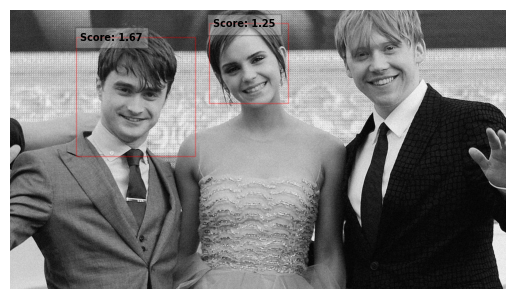

Do you want to check another image? (yes/no) no
Bye bye


In [4]:
from face_detection_project.utils import *

import numpy as np
import matplotlib.pyplot as plt
import matplotlib.patches as patches
import os
import joblib

TEST_PATH = '/content/face_detection_project/test_face_detection'
images = os.listdir(TEST_PATH)
model = joblib.load('/content/face_detection_project/my_model.joblib')
bboxes_dict = {}
answer = ""

while answer.lower()!="no":

  for i, image in enumerate(images):
    print(f"{i+1}) {image}")

  while True:
    try:
      n = float(input("Enter the number associated with the image you want: "))
    except ValueError:
      print("Invalid command. Please enter a number between 1 and 22.")
    else:
      if n.is_integer() and 1 <= n <= 22:
        n = int(n)
        break
      print("Invalid command. Please enter a number between 1 and 22.")

  filename = images[n-1]
  path = os.path.join(TEST_PATH, filename)

  bboxes, scores = detect_faces(path,
                                model,
                                threshold=0.6,
                                patch_size=(96, 96),
                                overlapping_threshold=.4)

  bboxes_dict[filename] = {'(x, y, x+w, y+h) values': bboxes, 'scores': scores}
  total = len(bboxes)

  print("Number of detected faces:", total)
  for i, box, score in zip(range(total), bboxes, scores):
    print(f"{i+1}) Coordinates: {box}, score: {score}")

  show_bboxes(path, bboxes, scores)

  answer = input("Do you want to check another image? (yes/no) ")

  while answer.lower() not in ("yes", "no"):
    print("Invalid answer.")
    answer = input("Do you want to check another image? (yes/no) ")

  if answer.lower() == "no":
    print("Bye bye")